# 최적화 (Optimize)
- 모델이 예측한 결과와 정답간의 차이(오차)를 가장 적게 만드는 Parameter를 찾는 과정을 최적화
- 모델의 예측값과 실제 값의 차이를 계산하는 함수를 만들고 그 값이 최소가 되는 지점을 찾는 작업

## 최적화 문제
- 함수 f(w) 의 값을 최소화(또는 최대화) 하는 변수 w(파라미터)를 찾는 것
$$
w_{i} = \arg \min_w f(w) 
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
# 한글 처리
mpl.rcParams['font.family'] = 'malgun gothic'
mpl.rcParams['axes.unicode_minus'] = False

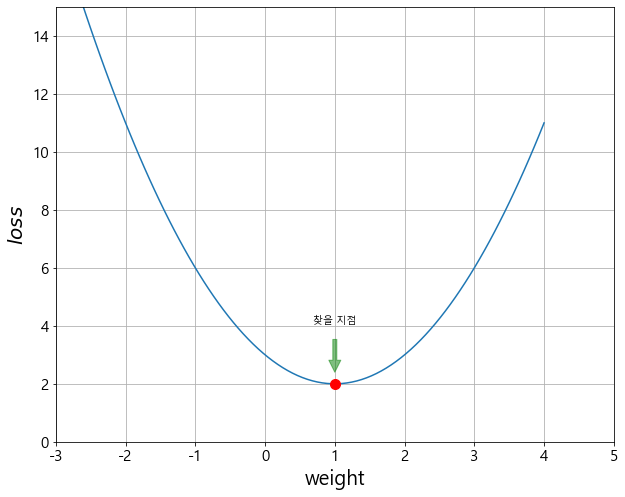

In [2]:
# 예제) 오차를 구하는 함수
# 매개변수로 가중치(weight)받아서 오차를 구한 다음 오차를 반환
def loss_func(weight):
    return (weight-1)**2 + 2 

plt.figure(figsize=(10,8))
weights = np.linspace(-3,4, 100) # 오차를 최소화하는 weight 후보

plt.plot(weights, loss_func(weights))
plt.plot(1,2, 'ro', markersize=10)

plt.annotate('찾을 지점', ha='center', va='bottom', # text 위치 조정
             xytext=(1, loss_func(1)+2), # 설명 text 출력 좌표
             xy=(1, loss_func(1)), # 화살표 위치 좌표
             arrowprops={'facecolor' : 'green', 
                         'edgecolor':'green', 
                         'shrink' : 0.2, 
                         'alpha':0.5 })



plt.ylim(0,15)
plt.xlim(-3,5)
plt.xlabel('weight')
plt.ylabel('$loss$')
plt.grid(True)
plt.show()

### 목적함수(Object Function), 손실함수(Loss Function), 비용함수(Cost Function), 오차함수(Error Function)
- 모델의 예측한 값과 실제값 사이의 차이를 정의하는 함수로 모델이 학습 시 사용
- 이 함수의 반환값(Loss)을 최소화 하는 파라미터을 찾는 것이 최적화의 목적
- 해결하려는 문제에 맞춰 Loss 함수를 정의
    - Classification(분류)의 경우 cross entropy를 사용
    - Regression(회귀)의 경우 MSE(Mean Squared Error)를 사용

## 최적화 문제를 해결하는 방법
- Loss 함수 최적화 함수를 탐색
    - Loss를 최소화하는 weight들을 찾는 함수(공식)을 탐색
    - Feature와 sample 수가 많아 질 수록 계산량이 급증
    - 최적화 함수가 없는 Loss함수도 존재
    
- **경사하강법 (Gradient Descent)**
    - 값을 조금씩 조금씩 조정해나가면서 최소값을 탐색

## 경사하강법 (Gradient Descent)
- 다양한 종류의 문제에서 최적의 해법을 찾을 수 있는 **일반적인 최적화 알고리즘**
- 손실함수를 최소화하는 파라미터를 찾기위해 반복해서 조정 
    - 파라미터 벡터 $W$에 대해 손실함수의 현재 gradient(경사,기울기)를 계산
    - gradient가 감소하는 방향으로 벡터 $W$를 조정
    - gradient가 0이 될때 까지 반복
- gradient가 양수이면 loss와 weight가 비례관계란 의미이므로 loss를 더 작게 하려면 weight가 감소    
- gradient가 음수이면 loss와 weight가 반비례관계란 의미이므로 loss를 더 작게 하려면 weight가 증가

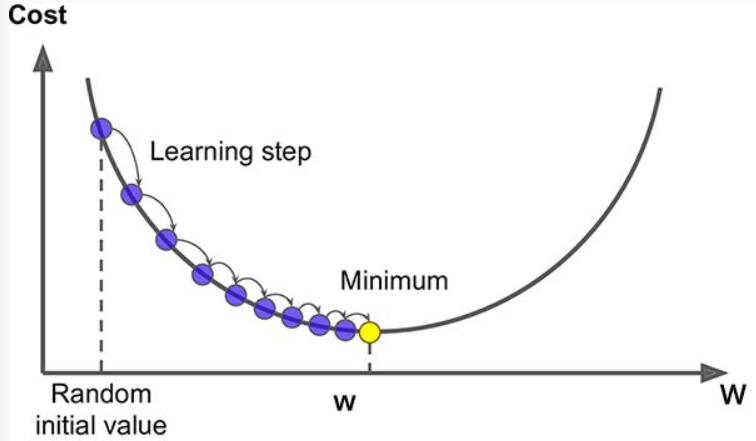

### 파라미터 조정

$$
W_{new} = W-\alpha\frac{\partial}{\partial {W}}cost(W)
$$


<center>$W$: 파라미터<br>$\alpha$:학습률<br></center> 

- 학습률 (Learning rate)
    - 기울기에 따라 이동할 step의 크기. 경사하강법 알고리즘에서 지정해야하는 하이퍼 파라미터이다
    - 학습률을 너무 작게 잡으면 최소값에 수렴하기 위해 많은 반복을 진행해야해 오랜 시간 소요
    - 학습률을 너무 크게 잡으면 왔다 갔다 하다가 오히려 더 큰 값으로 발산하여 최소값에 수렴 불가

In [3]:
def loss(weight):
    return (weight-1)**2 + 2 

In [4]:
# Gradient를 구할 loss 함수의 도함수
def derived_loss(weight):
    return 2*(weight-1)

1차시도: w=0.00, 기울기 = -2.00
2차시도: w=0.80, 기울기 = -0.40
3차시도: w=0.96, 기울기 = -0.08
4차시도: w=0.99, 기울기 = -0.02
5차시도: w=1.00, 기울기 = -0.00
6차시도: w=1.00, 기울기 = -0.00


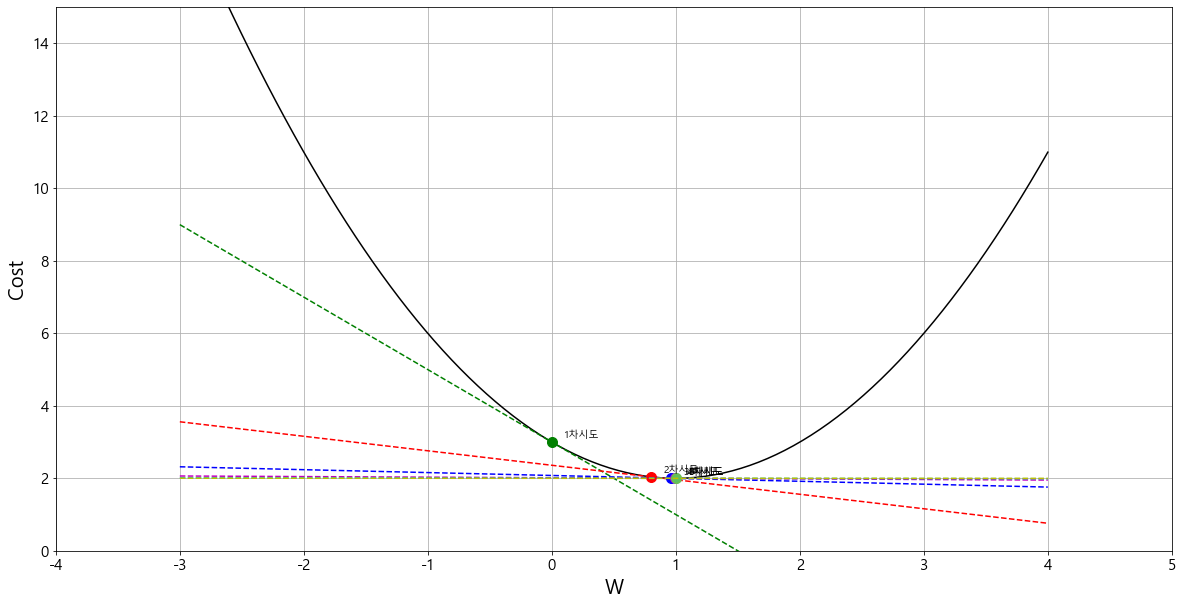

In [5]:
weights = np.linspace(-3,4, 100)

plt.figure(figsize=(20,10))
plt.plot(weights, loss(weights), 'k-')

learning_rate = 0.4
# learning_rate = 0.01 
# learning_rate = 1.1

# w: 조정할 가중치
w = 0 # 시작 weight (random initial value)

# w값에서의 기울기
plt.plot(w, loss(w), 'go', markersize=10) # w=0 때 loss값에 마킹 (g : green, o : 마커모양)
plt.text(w+0.1, loss(w)+0.1, '1차시도')
plt.plot(weights, derived_loss(w)*(weights) + loss(w), 'g--') # w=0 때 기울기(gradient, 미분값)를 line plot으로 시각화
print('1차시도: w={:.2f}, 기울기 = {:.2f}'.format(w, derived_loss(w))) # 기울기값 출력

w = w - learning_rate*derived_loss(w) # 다음 weight 계산
plt.plot(w, loss(w), 'ro', markersize=10)
plt.text(w+0.1, loss(w)+0.1, '2차시도')
plt.plot(weights, derived_loss(w)*(weights-w) + loss(w), 'r--')
print('2차시도: w={:.2f}, 기울기 = {:.2f}'.format(w, derived_loss(w)))

w = w - learning_rate*derived_loss(w)
plt.plot(w, loss(w), 'bo', markersize=10)
plt.text(w+0.1, loss(w)+0.1, '3차시도')
plt.plot(weights, derived_loss(w)*(weights-w) + loss(w), 'b--')
print('3차시도: w={:.2f}, 기울기 = {:.2f}'.format(w, derived_loss(w)))


w = w - learning_rate*derived_loss(w)
plt.plot(w, loss(w), 'mo', markersize=10)
plt.text(w+0.1, loss(w)+0.1, '4차시도')
plt.plot(weights, derived_loss(w)*(weights-w) + loss(w), 'm--')
print('4차시도: w={:.2f}, 기울기 = {:.2f}'.format(w, derived_loss(w)))


w = w - learning_rate*derived_loss(w)
plt.plot(w, loss(w), 'co', markersize=10)
plt.text(w+0.1, loss(w)+0.1, '5차시도')
plt.plot(weights, derived_loss(w)*(weights-w) + loss(w), 'c--')
print('5차시도: w={:.2f}, 기울기 = {:.2f}'.format(w, derived_loss(w)))

w = w - learning_rate*derived_loss(w)
plt.plot(w, loss(w), 'yo', markersize=10, alpha=0.5)
plt.text(w+0.1, loss(w)+0.1, '6차시도')
plt.plot(weights, derived_loss(w)*(weights-w) + loss(w), 'y--')
print('6차시도: w={:.2f}, 기울기 = {:.2f}'.format(w, derived_loss(w)))

plt.ylim(0,15)
plt.xlim(-4,5)
plt.xlabel('W')
plt.ylabel('Cost')
plt.grid(True)
plt.show()

##### 반복문을 이용해 gradient가 0이 되는 지점의 weight 찾기

In [6]:
w = np.random.randint(-3,3) # 초기 weight를 랜덤하게 선택(-3 ~ 3-1 사이의 정수)
learning_rate = 0.4
# learning_rate = 0.001
# learning_rate = 10
max_iter = 100 # 최대 반복횟수 (최적의 weight를 찾으면 중단 못찾으면 최대 100번까지 탐색)
w_list = [w] # weight값들을 저장할 list
cnt = 0 # 반복 회수를 저장할 변수
while True:
    if derived_loss(w)==0: # 기울기가 0일 경우 중단
        break
    if cnt==max_iter: # 반복 회수가 max_iter와 같을 경우 중단
        break
    w = w - learning_rate*derived_loss(w) # 새로운 weight를 계산
    w_list.append(w) # 새 weight를 list에 추가
    cnt += 1 # 반복회수 1 증가

In [7]:
print('반복횟수:', cnt)

반복횟수: 24


In [8]:
[w_list]

[[-2,
  0.40000000000000036,
  0.8800000000000001,
  0.976,
  0.9952,
  0.99904,
  0.999808,
  0.9999616,
  0.99999232,
  0.999998464,
  0.9999996928,
  0.99999993856,
  0.999999987712,
  0.9999999975424,
  0.99999999950848,
  0.999999999901696,
  0.9999999999803392,
  0.9999999999960678,
  0.9999999999992135,
  0.9999999999998427,
  0.9999999999999686,
  0.9999999999999937,
  0.9999999999999988,
  0.9999999999999998,
  1.0]]